# Phase 1 Code Challenge Review

![let's do this](https://media.giphy.com/media/BpGWitbFZflfSUYuZ9/giphy.gif)

The topics covered will be:

  - [Interacting with Pandas dataframes](#dataframes)
  - [Visualization](#viz)
  - [Python Data Structures](#datastructures)
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import json

%load_ext autoreload
%autoreload 2



<a id='dataframes'></a>
# DataFrames

To practice working with dataframes, we will use some Facebook data taken from the UCI Machine Learning repository.

Refer to this paper if you are interested in learning more. There is also a nice description of the features: http://www.math-evry.cnrs.fr/_media/members/aguilloux/enseignements/m1mint/moro2016.pdf



# Task 1

Read 'dataset_Facebook.csv' from data/Facebook_metrics into the notebook as a Pandas dataframe.

In [30]:
# Your code here
facebook = pd.read_csv('data/Facebook_metrics/dataset_Facebook.csv', delimiter=';')
facebook.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


# Task 2

### 2a: Count how many na's there are in each column
 

In [31]:
# Your code here
facebook.isna().sum()

Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   1
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked your Page           0
Lifetime Post reach by people who like your Page   

### 2b: Drop records that have na's in any column without altering the dataframe in memory
 

In [167]:
# Your code here
facebook.dropna(inplace=False)
facebook.isna().sum()


Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   0
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked your Page           0
Lifetime Post reach by people who like your Page   

### 2c: Drop records that have na's in the `share` column while altering the dataframe in memory

In [168]:
# Your code here
facebook=facebook[facebook['share'].notna()]
facebook.head()
len(facebook)

495

# Task 3

An impression is each time a post is displayed.  

Create a new column called `likes_per_impression` which divides the number of comments per post by the number of likes per post.

In [170]:
# Your code here
facebook['likes_per_impression']=facebook['comment']/facebook['like']
# facebook = facebook.replace([np.inf, -np.inf], np.nan)
facebook['likes_per_impression']

0      0.050633
1      0.038462
2      0.000000
3      0.036896
4      0.058462
         ...   
494    0.080000
495    0.094340
496    0.000000
497    0.043011
498    0.076923
Name: likes_per_impression, Length: 495, dtype: float64

# Task 4

Locate the `record` of a **Photo** that has the largest value in the `like` column

In [173]:
# Your code here
# facebook[facebook['Type']=='Photo'].agg({'like':max})
facebook[(facebook['like'] == facebook.loc[facebook['Type'] == 'Photo']['like'].max()) & (facebook['Type'] == 'Photo')]



,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions,likes_per_impression
244,130791,Photo,2,7,3,5,1.0,180480,319133,8072,4010,6242,108752,51456,3316,372,5172.0,790.0,6334,0.071926


# Task 5
What is the mean number of Total Interactions for photos?

In [42]:
# Your code here
mean_interactions_photos = facebook[facebook['Type']=='Photo']['Total Interactions'].mean()
mean_interactions_photos

218.80522565320666

<a id='viz'></a>
# Visualization

# Task 6

Create a bar chart showing the number of posts per month.
Order the x-axis by month as they appear on the calendar.
Don't forget to add labels and a title.  

Use the `plt.subplot` method if you can, but if you can't, resort to the `plt` syntax.

[Text(0, 0, 'Jan'),
 Text(1, 0, 'Feb'),
 Text(2, 0, 'Mar'),
 Text(3, 0, 'Apr'),
 Text(4, 0, 'May'),
 Text(5, 0, 'Jun'),
 Text(6, 0, 'Jul'),
 Text(7, 0, 'Aug'),
 Text(8, 0, 'Sept'),
 Text(9, 0, 'Oct'),
 Text(10, 0, 'Nov'),
 Text(11, 0, 'Dec')]

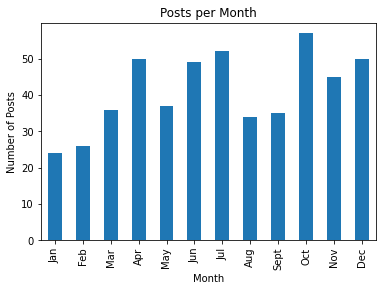

In [92]:
# Your code here
ax=facebook.groupby('Post Month').count()['Type'].plot.bar(title='Posts per Month')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Posts')
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
ax.set_xticklabels(months)

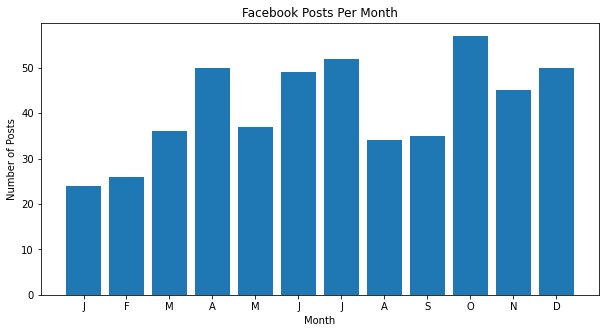

In [175]:
x = facebook['Post Month'].value_counts().sort_index().index
y = facebook['Post Month'].value_counts().sort_index().values
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x,y)
ax.set_title('Facebook Posts Per Month')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Posts')
ax.set_xticks(range(1,13))
ax.set_xticklabels(list('JFMAMJJASOND'));


# Task 7

Create a scatter plot that shows the correlation between total interactions and likes.

Text(0.5, 1.0, 'Interactions by Likes')

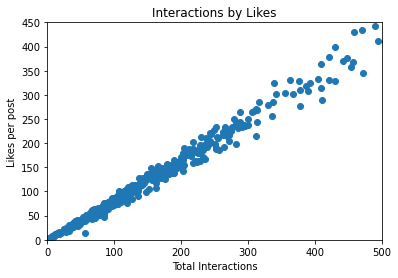

In [107]:
# Your code here
fig,ax=plt.subplots()
ax.scatter(facebook['Total Interactions'],facebook['like'])
ax.set_xlim(0,500)
ax.set_ylim(0,450)
ax.set_xlabel('Total Interactions')
ax.set_ylabel('Likes per post')
ax.set_title('Interactions by Likes')

<a id='datastructures'></a>
# Data Structures

For this next section, we will explore a nested dictionary that comes from the Spotify API.  

The `data` variable below contains 6 separate pings, each of which returns a list of the top 20 songs streamed on a given day.


In [108]:
with open('data/offset_newreleases.p','rb') as read_file:
    responses = pickle.load(read_file)

In [122]:
data = [json.loads(r) for r in responses]

list

In [110]:
len(data)

6

We will work only with the first response.

In [132]:
first_response = data[0]
first_response['albums']['items']

[{'album_type': 'single',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/7CajNmpbOovFoOoasH2HaY'},
    'href': 'https://api.spotify.com/v1/artists/7CajNmpbOovFoOoasH2HaY',
    'id': '7CajNmpbOovFoOoasH2HaY',
    'name': 'Calvin Harris',
    'type': 'artist',
    'uri': 'spotify:artist:7CajNmpbOovFoOoasH2HaY'},
   {'external_urls': {'spotify': 'https://open.spotify.com/artist/1Xyo4u8uXC1ZmMpatF05PJ'},
    'href': 'https://api.spotify.com/v1/artists/1Xyo4u8uXC1ZmMpatF05PJ',
    'id': '1Xyo4u8uXC1ZmMpatF05PJ',
    'name': 'The Weeknd',
    'type': 'artist',
    'uri': 'spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ'}],
  'available_markets': ['AD',
   'AE',
   'AL',
   'AR',
   'AT',
   'AU',
   'BA',
   'BE',
   'BG',
   'BH',
   'BO',
   'BR',
   'BY',
   'CA',
   'CH',
   'CL',
   'CO',
   'CR',
   'CY',
   'CZ',
   'DE',
   'DK',
   'DO',
   'DZ',
   'EC',
   'EE',
   'EG',
   'ES',
   'FI',
   'FR',
   'GB',
   'GR',
   'GT',
   'HK',
   'HN',
   'HR',
   'HU',
 

# Task 8

Explore the `first_response` dictionary and find how to access the list of twenty songs.
Assign the list to the variable `first_twenty_songs`.
Hint: print out the keys at each level with .keys().

In [151]:
# Your code here
first_response['albums'].keys()

first_twenty_songs = [a_dict for a_dict in first_response['albums']['items']]
first_twenty_songs

[{'album_type': 'single',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/7CajNmpbOovFoOoasH2HaY'},
    'href': 'https://api.spotify.com/v1/artists/7CajNmpbOovFoOoasH2HaY',
    'id': '7CajNmpbOovFoOoasH2HaY',
    'name': 'Calvin Harris',
    'type': 'artist',
    'uri': 'spotify:artist:7CajNmpbOovFoOoasH2HaY'},
   {'external_urls': {'spotify': 'https://open.spotify.com/artist/1Xyo4u8uXC1ZmMpatF05PJ'},
    'href': 'https://api.spotify.com/v1/artists/1Xyo4u8uXC1ZmMpatF05PJ',
    'id': '1Xyo4u8uXC1ZmMpatF05PJ',
    'name': 'The Weeknd',
    'type': 'artist',
    'uri': 'spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ'}],
  'available_markets': ['AD',
   'AE',
   'AL',
   'AR',
   'AT',
   'AU',
   'BA',
   'BE',
   'BG',
   'BH',
   'BO',
   'BR',
   'BY',
   'CA',
   'CH',
   'CL',
   'CO',
   'CR',
   'CY',
   'CZ',
   'DE',
   'DK',
   'DO',
   'DZ',
   'EC',
   'EE',
   'EG',
   'ES',
   'FI',
   'FR',
   'GB',
   'GR',
   'GT',
   'HK',
   'HN',
   'HR',
   'HU',
 

# Task 9

Create a list of **track names** of all twenty songs using a for loop or list comprehension.

In [153]:
track_names = [a_dict['name'] for a_dict in first_twenty_songs]

track_names

# Your code here

['Over Now (with The Weeknd)',
 'Ice Cream (with Selena Gomez)',
 'Smile',
 'ENERGY (Deluxe)',
 'Spotify Singles',
 'B4 The Storm',
 'CTV3: Cool Tape Vol. 3',
 'Starting Over',
 'No Ceilings (feat. Lil Wayne & Jay Gwuapo)',
 'Why Do You Lie To Me',
 'Deep Reverence',
 'Una Niña Inútil',
 'Celia',
 'conversations with myself about you',
 'Whole New Mess',
 'Renaissance',
 'Higher Place',
 'rue',
 'Tumbleweed',
 '1999']

# Task 10

Create a dictionary called `song_dictionary` which consists of each track name `string` as a key and a `list` of artists associated with each track as a value.

In [160]:
song_dictionary = {}
for a_dict in first_twenty_songs:
    track_name=a_dict['name']
    artists=[a['name'] for a in a_dict['artists']]
    song_dictionary[track_name]=artists
song_dictionary
# Your code here

{'Over Now (with The Weeknd)': ['Calvin Harris', 'The Weeknd'],
 'Ice Cream (with Selena Gomez)': ['BLACKPINK', 'Selena Gomez'],
 'Smile': ['Katy Perry'],
 'ENERGY (Deluxe)': ['Disclosure'],
 'Spotify Singles': ['Giveon'],
 'B4 The Storm': ['Internet Money'],
 'CTV3: Cool Tape Vol. 3': ['Jaden'],
 'Starting Over': ['Chris Stapleton'],
 'No Ceilings (feat. Lil Wayne & Jay Gwuapo)': ['A$AP Ferg'],
 'Why Do You Lie To Me': ['Topic', 'A7S'],
 'Deep Reverence': ['Big Sean', 'Nipsey Hussle'],
 'Una Niña Inútil': ['Cazzu'],
 'Celia': ['Tiwa Savage'],
 'conversations with myself about you': ['lovelytheband'],
 'Whole New Mess': ['Angel Olsen'],
 'Renaissance': ['Aluna'],
 'Higher Place': ['Skip Marley'],
 'rue': ['girl in red'],
 'Tumbleweed': ['Keith Urban'],
 '1999': ['Rich Brian']}

# Task 11

Create a function with takes an **artist name** and the **song_dictionary** as arguments, and returns a `list` of songs written by that artist. 

In [161]:
# Your code here
def find_songs_by_artist(artist_name,song_dictionary):
    list_of_songs=[]
    for song in song_dictionary:
        if artist_name in song_dictionary[song]:
            list_of_songs.append(song)
    return (list_of_songs)

In [163]:
find_songs_by_artist('Selena Gomez', song_dictionary)

['Ice Cream (with Selena Gomez)']